In [43]:
!unzip a.zip

Archive:  a.zip
  inflating: glove.6B.100d.txt       


Embeddings shape: torch.Size([6, 100])


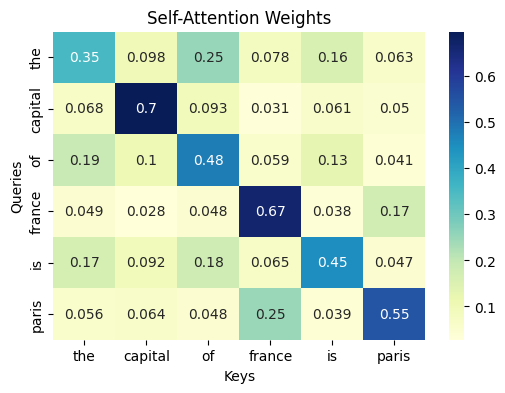

In [46]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Загрузите GloVe embeddings вручную
def load_glove_embeddings(glove_path):
    embeddings = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Укажите путь к файлу GloVe
glove_path = "/content/glove.6B.100d.txt"  # Замените на путь к вашему файлу
glove_embeddings = load_glove_embeddings(glove_path)

# 2. Преобразуем слова в векторы (embeddings)
sentence = ["the", "capital", "of",'france','is','paris']  # GloVe использует слова в нижнем регистре

# Получаем embeddings для каждого слова в предложении
embeddings = torch.stack([torch.tensor(glove_embeddings[word]) for word in sentence])
print("Embeddings shape:", embeddings.shape)  # [3, 100]

# 3. Вычисляем Self-Attention
def self_attention(Q, K, V):
    d_k = Q.size(-1)
    scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))
    weights = F.softmax(scores, dim=-1)
    output = torch.matmul(weights, V)
    return output, weights

# Используем embeddings как Q, K, V
Q = embeddings  # Запросы
K = embeddings  # Ключи
V = embeddings  # Значения

output, attention_weights = self_attention(Q, K, V)

# 4. Визуализация весов внимания
def plot_attention_weights(weights, sentence):
    plt.figure(figsize=(6, 4))
    sns.heatmap(weights, annot=True, xticklabels=sentence, yticklabels=sentence, cmap="YlGnBu")
    plt.title("Self-Attention Weights")
    plt.xlabel("Keys")
    plt.ylabel("Queries")
    plt.show()

# Преобразуем attention_weights в numpy для визуализации
attention_weights = attention_weights.detach().numpy()

# Визуализируем
plot_attention_weights(attention_weights, sentence)